# ----------------------------- Mašinsko učenje, Domaći zadatak 3 -----------------------------
# -------------------------------- Jovan Dmitrović, 2021/3096 ----------------------------------

# Učitavanje biblioteka za rad 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import shuffle
import seaborn as sb
import pickle

font = {'size'   : 13}

matplotlib.rc('font', **font)

random.seed(1)

# Implementacija potrebnih funkcija za učitavanje podataka

In [2]:
def get_classes_info(y: np.ndarray, show_text: bool=True) -> list:
    
    """
        Funkcija za izvlacenje klasa i prebrojavanja primera
        sa istom klasom
        
        params: 
            - y: vektor klasa
                               
        :return:
            - classes: lista klasa
            - classes_dict: recnik klasa sa njihovim brojem predstavnika
    """
    # dohvatanje svih vrednosti klasa
    classes = []
    for _class in y:
        if _class not in classes:
            classes.append(int(_class))
    classes.sort()
    
    assert classes == [-1, 1], 'Klase nisu odgovarajucih vrednosti!'
            
    # prebrojavanje predstavnika klasa
    classes_dict = dict.fromkeys(classes)
    for _class in classes:
        class_count = np.count_nonzero(y == _class)
        classes_dict[_class] = class_count
        
    # broj klasa
    k = len(classes_dict.keys())
        
    # ispis podataka o klasama u dataset-u
    if show_text:
        print('-------------------------------------------------------')
        print(f'Ukupan broj klasa kojima pripadaju ucitani primeri je: {k}\n')
        print('Ucitane klase i brojevi njhovih predstavnika/primera su: ')
        for _class in classes_dict.keys():
            pr = 'primera'
            if classes_dict[_class] % 10 == 1:
                pr = 'primer'
            print(f'\tKlasa {_class}: {classes_dict[_class]} {pr}')
        print('-------------------------------------------------------')
    
    return classes, classes_dict

In [3]:
def read_data(class_info: str='linear', separator_index: int=2) -> tuple:
    
    """
        Funkcija za ucitavanje podataka na osnovu kojih se
        kreira model.
        
        :params: 
            - class_info: informacija o tome kakve su klase ('linear' i 'nonlinear')
            - separator_index: broj kolone do koje se nalaze
                               ulazni podaci, odnosno od koje
                               pocinju izlazni podaci
                               
        :return:
            - X: matrica primera svih prediktora
            - y: vektor izlaza
    """
    
    if class_info == 'linear':
        path = 'svmData_ls.csv'
    elif class_info == 'nonlinear':
        path = 'svmData_nls.csv'
    
    data = pd.read_csv(path).to_numpy()
    
    # razdvajanje ulaznih i izlaznih promenljivih
    X, y = data[:,0:separator_index], data[:,separator_index]
    
    return X, y

In [4]:
def train_test_data_split(X: np.ndarray, y: np.ndarray, split_ratio: float=0.8) -> tuple:
    
    """
        Funkcija za mesanje klasa i splitovanje svih dostupnih podataka na 
        trening/obucavajuce i test podatke prema zadatom postotku (split_ratio).
        U funkciji se vodi racuna da balans izmedju klasa u dva nova skupa podataka
        bude isti kao i kod originalnih prosledjenih podataka.
        
        :params:
            - X: matrica primera svih prediktora
            - y: vektor klasa 
            - split_ratio: vrednost iz intervala [0,1] koja oznacava procenat
                           trening podataka
                           
        :return:
            - X_train: matrica primera svih prediktora za trening skup
            - y_train: vektor izlaza za trening skup
            - X_test: matrica primera svih prediktora za test skup
            - y_test: vektro izlaza za test skup
    """
    
    random.seed(1)
    
    # broj primera trening skupa
    m_train = 0
    
    classes, classes_dict = get_classes_info(y, False)
    
    train_indices = set()
    test_indices = set()
    
    # formiranje zasebnih splitova, kako bi svaka klasa imala split_ratio * 100% odbiraka u trening skupu
    for i in classes:
        m = classes_dict[i]
        
        class_train_set_size = int(m*split_ratio)
        m_train += class_train_set_size

        class_ind = np.where(y == i)[0].tolist()

        # odredjivanje indeksa za trening skup za jednu klasu
        class_train_set_ind = random.sample(class_ind, k=class_train_set_size)
        
        # dodavanje u globalni set indeksa za trening skup
        train_indices.update(list(class_train_set_ind))

        # odredjivanje indeksa za test skup za jednu klasu
        class_test_set_ind = set(class_ind) - set(class_train_set_ind)
        
        # dodavanje u globalni set indeksa za test skup
        test_indices.update(list(class_test_set_ind))
        
    train_indices = list(train_indices)
    test_indices = list(test_indices)
    
    # podela podataka na trening i test podatke
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # mesanje podataka
    X_train, y_train = shuffle(X_train, y_train, random_state=0)
    X_test, y_test = shuffle(X_test, y_test, random_state=0)
    
    return X_train, y_train, X_test, y_test

In [5]:
def plot_data(X: np.ndarray, y: np.ndarray, title: str) -> None:
    
    """
        Funkcija za iscrtavanje podataka.
        
        :params:
            - X: matrica primera svih prediktora
            - y: vektor klasa 
            - title: naslov plot-a
                           
        :return:
            - None
    """
    
    assert X.shape[1] == 2, 'Podatke nije moguce prikazati!' 
    
    fig = plt.figure(figsize=(12,10))
    plt.scatter(X[:, 0], X[:, 1], s = 50, c = y, cmap ='jet')
    plt.axis('equal')
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title(title)
    plt.grid()
    plt.show()

# Učitavanje podataka 

#######################################################################################
------------------- Ucitani su podaci za linearno separabilne klase -------------------
Ukupan broj ucitanih primera je: 49
Ukupan broj ucitanih prediktora (dim(X)) je: 2
-------------------------------------------------------
Ukupan broj klasa kojima pripadaju ucitani primeri je: 2

Ucitane klase i brojevi njhovih predstavnika/primera su: 
	Klasa -1: 24 primera
	Klasa 1: 25 primera
-------------------------------------------------------


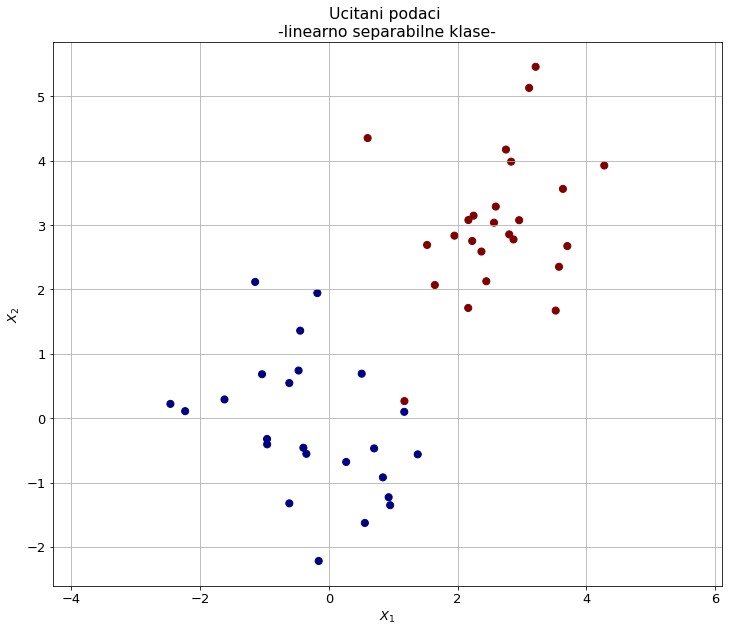

#######################################################################################
------------------ Ucitani su podaci za nelinearno separabilne klase ------------------
Ukupan broj ucitanih primera je: 99
Ukupan broj ucitanih prediktora (dim(X)) je: 2
-------------------------------------------------------
Ukupan broj klasa kojima pripadaju ucitani primeri je: 2

Ucitane klase i brojevi njhovih predstavnika/primera su: 
	Klasa -1: 51 primer
	Klasa 1: 48 primera
-------------------------------------------------------


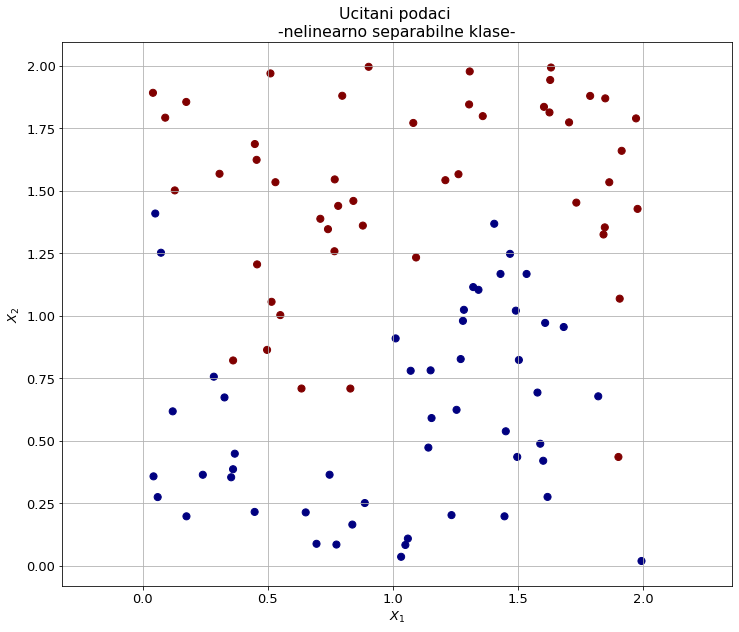

In [6]:
X_lin, y_lin = read_data('linear')

print('#######################################################################################')
print('------------------- Ucitani su podaci za linearno separabilne klase -------------------')
print(f'Ukupan broj ucitanih primera je: {X_lin.shape[0]}')
print(f'Ukupan broj ucitanih prediktora (dim(X)) je: {X_lin.shape[1]}')

classes, _ = get_classes_info(y_lin)
plot_data(X_lin, y_lin, 'Ucitani podaci \n-linearno separabilne klase-')

X_nlin, y_nlin = read_data('nonlinear')

print('#######################################################################################')
print('------------------ Ucitani su podaci za nelinearno separabilne klase ------------------')
print(f'Ukupan broj ucitanih primera je: {X_nlin.shape[0]}')
print(f'Ukupan broj ucitanih prediktora (dim(X)) je: {X_nlin.shape[1]}')

classes, _ = get_classes_info(y_nlin)
plot_data(X_nlin, y_nlin, 'Ucitani podaci \n-nelinearno separabilne klase-')